<a href="https://colab.research.google.com/github/rish4/CNN-on-KID/blob/master/cnn_KID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CNN for healthy v/s unhealthy classification of WCE images from KID dataset


In [1]:
# Convolutional Neural Network

# Building the CNN

# Importing the Keras packages 
from keras.models import Sequential   #to initialize the neural network
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense      # to add fully connected layers in ANN
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

Using TensorFlow backend.


In [2]:
# Initializing the CNN
classifier = Sequential()

# Step-1 Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape=(64, 64, 3), activation='relu'))

#Step-2 Max Pooling
classifier.add(MaxPooling2D(pool_size=(2,2)))

# Adding second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

# Step-3 Flattening
classifier.add(Flatten())

# Full Connection
classifier.add(Dense(output_dim=128, activation='relu'))
classifier.add(Dense(output_dim=1, activation='sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`


In [0]:
# Compiling the CNN
classifier.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
# Fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/KID dataset - Copy (1)/Training set (1)',
                                                 target_size = (64, 64),
                                                 batch_size = 16,
                                                 class_mode = 'binary')

Found 782 images belonging to 2 classes.


In [6]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/KID dataset - Copy (1)/Test set (1)',
                                            target_size = (64, 64),
                                            batch_size = 16,
                                            class_mode = 'binary')


Found 85 images belonging to 2 classes.


In [7]:
r=classifier.fit_generator(training_set,
                         samples_per_epoch = 782,
                         nb_epoch = 25,
                         validation_data = test_set,
                         nb_val_samples = 85)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=48, epochs=25, validation_steps=85)`
  """


Epoch 1/25
48/48 [==============================] - 13s 265ms/step - loss: 0.4950 - accuracy: 0.7467 - val_loss: 0.4909 - val_accuracy: 0.8118
Epoch 2/25
48/48 [==============================] - 12s 250ms/step - loss: 0.4274 - accuracy: 0.7924 - val_loss: 0.1384 - val_accuracy: 0.9303
Epoch 3/25
48/48 [==============================] - 12s 250ms/step - loss: 0.3497 - accuracy: 0.8368 - val_loss: 0.1906 - val_accuracy: 0.9154
Epoch 4/25
48/48 [==============================] - 12s 250ms/step - loss: 0.3152 - accuracy: 0.8708 - val_loss: 0.2102 - val_accuracy: 0.9411
Epoch 5/25
48/48 [==============================] - 12s 248ms/step - loss: 0.2990 - accuracy: 0.8799 - val_loss: 0.2574 - val_accuracy: 0.9386
Epoch 6/25
48/48 [==============================] - 12s 249ms/step - loss: 0.2456 - accuracy: 0.9073 - val_loss: 0.1115 - val_accuracy: 0.9054
Epoch 7/25
48/48 [==============================] - 12s 244ms/step - loss: 0.2940 - accuracy: 0.8864 - val_loss: 0.1907 - val_accuracy: 0.9643

Loss Curve

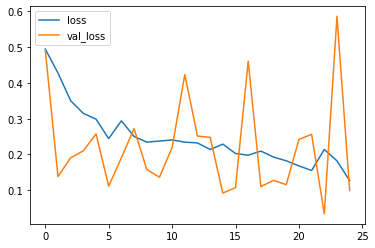

In [8]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

Accuracy Curve

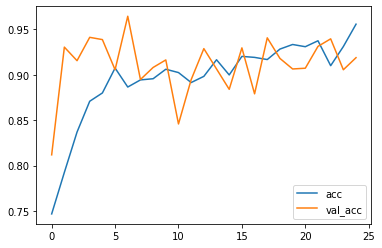

In [9]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [26]:
# Confusion Matrix
#Confusion Matrix and Classification Report
Y_pred= classifier.predict_generator(test_set, 85/16)  #num_of_test_samples // batch_size+1 
#y_pred= np.argmax(Y_pred, axis=1)
y_pred= np.where(Y_pred>0.5, 1, 0)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))
print('Classification Report')
target_names = ['Healthy', 'Unhealthy']
print(classification_report(test_set.classes, y_pred, target_names=target_names))

Confusion Matrix
[[17 23]
 [20 25]]
Classification Report
              precision    recall  f1-score   support

     Healthy       0.46      0.42      0.44        40
   Unhealthy       0.52      0.56      0.54        45

    accuracy                           0.49        85
   macro avg       0.49      0.49      0.49        85
weighted avg       0.49      0.49      0.49        85

